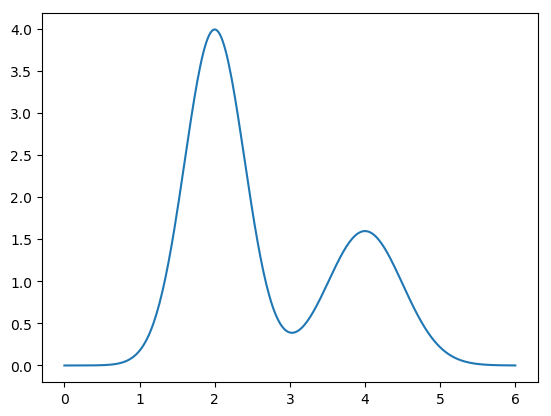

1-element Array{PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x1a31d50b8>

In [1]:
using PyCall
# import Pkg; Pkg.add("ApproxFun")
include("../src/gauss_error.jl")
include("../src/kernels.jl")

a = 0.
b = 6.

function phi(x::Float64)
    mu1 = 2.
    mu2 = 4.
    n1 = 4.
    n2 = 2.
    sig1 = 0.4
    sig2 = 0.5

    norm(n, mu, sig, x) = n / sqrt(2 * pi*sig^2) * exp(-(x - mu)^2 / (2 * sig^2))
    return norm(n1, mu1, sig1, x) + norm(n2, mu2, sig2, x)
end

x = collect(range(a, stop=b, length=300))

using PyPlot
myplot = plot(x, phi.(x))

In [2]:
kernel_name = "triangular"

function kernel(x::Float64, y::Float64)
    return getOpticsKernels(kernel_name)(x, y)
end

kernel (generic function with 1 method)

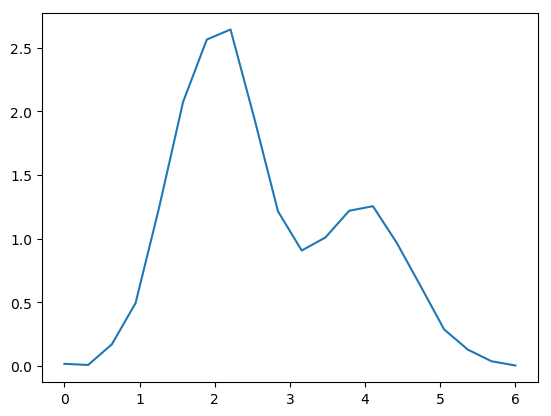

1-element Array{PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x1a34934e0>

In [3]:
convolution = y -> quadgk(x -> kernel(x,y) * phi(x), a, b, rtol=10^-5, maxevals=10^7)[1]
y = collect(range(a, stop=b, length=20))
ftrue = convolution.(y)
sig = 0.05*ftrue + [0.01 for i = 1:Base.length(ftrue)]
using Compat, Random, Distributions
noise = []
for sigma in sig
    n = rand(Normal(0., sigma), 1)[1]
    push!(noise, n)
end
f = ftrue + noise
plot(y, f)

┌ Info: Created Cubic spline basis.
└ @ Main /Users/ta_nyan/Documents/diploma/StatReg.jl/src/basis.jl:217


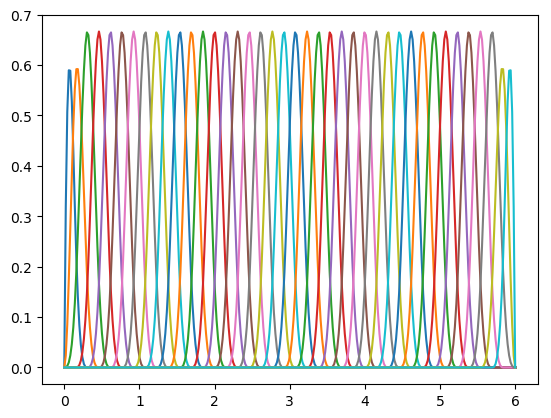

40


In [4]:
knots = collect(range(a, b, length=40))
basis = CubicSplineBasis(knots, ("dirichlet", "dirichlet"))
for basis_function in basis.basis_functions
    plot(x, basis_function.f.(x))
end
println(length(basis))

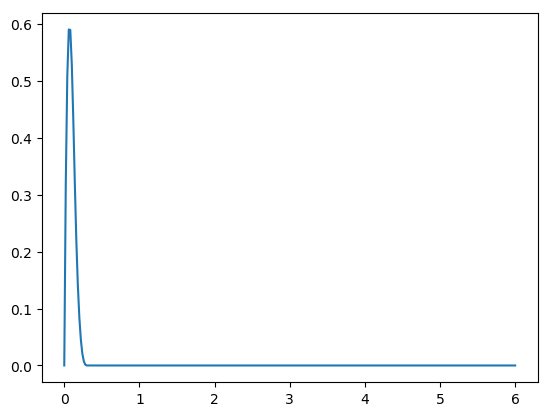

1-element Array{PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x1a3374dd8>

In [5]:
y = collect(range(a, stop=6, length=300))
plot(y, basis.basis_functions[1].f.(y))
# for z in collect(range(a, stop=6, length=300))
#     println(z, " ", basis.basis_functions[3].f(z))
# end

40

┌ Info: Calculating omega matrix for Cubis spline basis derivatives of order 2...
└ @ Main /Users/ta_nyan/Documents/diploma/StatReg.jl/src/basis.jl:225
┌ Info: Omega caclulated successfully.
└ @ Main /Users/ta_nyan/Documents/diploma/StatReg.jl/src/basis.jl:242


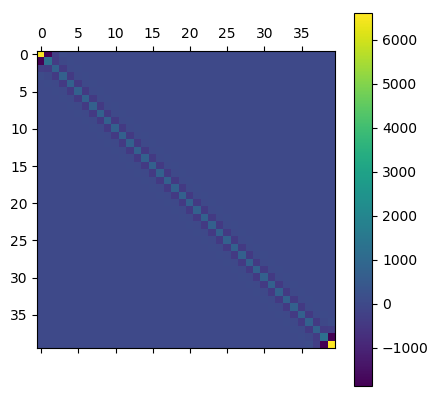

PyObject <matplotlib.colorbar.Colorbar object at 0x1a3860358>

In [6]:
print(length(basis))
my_omega = omega(basis, 2)[1]
# for i = 1:size(my_omega)[1]
#     for j = 1:size(my_omega)[1]
#         my_omega[i, j] = abs(my_omega[i, j])
#     end
# end
matshow(my_omega)
colorbar()

In [8]:
knots = collect(range(a, b, length=40))
my_knots = [0.0, 0.0, 0.0, 0.0, 0.153846, 0.307692, 0.461538, 0.615385, 0.769231, 0.923077, 1.07692, 1.23077, 1.38462, 1.53846, 1.69231, 1.84615, 2.0, 2.15385, 2.30769, 2.46154, 2.61538, 2.76923, 2.92308, 3.07692, 3.23077, 3.38462, 3.53846, 3.69231, 3.84615, 4.0, 4.15385, 4.30769, 4.46154, 4.61538, 4.76923, 4.92308, 5.07692, 5.23077, 5.38462, 5.53846, 5.69231, 5.84615, 6.0, 6.0, 6.0, 6.0]
my_b_spline = BSpline(3, 3, knots)

BSpline(3, 3, [0.0, 0.153846, 0.307692, 0.461538, 0.615385, 0.769231, 0.923077, 1.07692, 1.23077, 1.38462  …  4.61538, 4.76923, 4.92308, 5.07692, 5.23077, 5.38462, 5.53846, 5.69231, 5.84615, 6.0], getfield(Main, Symbol("##39#41")){Int64,Int64,Array{Float64,1}}(3, 3, [0.0, 0.153846, 0.307692, 0.461538, 0.615385, 0.769231, 0.923077, 1.07692, 1.23077, 1.38462  …  4.61538, 4.76923, 4.92308, 5.07692, 5.23077, 5.38462, 5.53846, 5.69231, 5.84615, 6.0], Core.Box(getfield(Main, Symbol("#b_spline_function#40"))(Core.Box(#= circular reference @-2 =#)))))

In [9]:
my_b_spline_func = my_b_spline.func

#39 (generic function with 1 method)

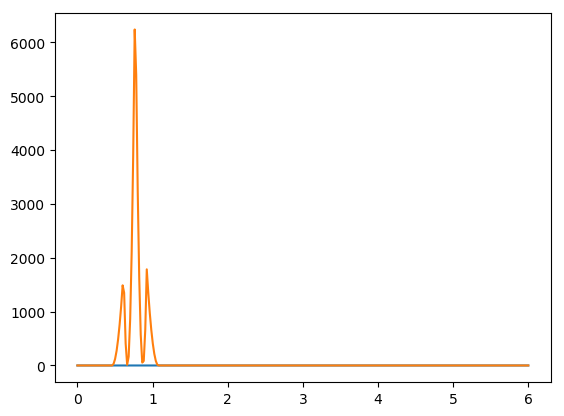

1-element Array{PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x1a3d9c860>

In [10]:
# import Pkg;
# Pkg.rm()
# Pkg.add("Calculus")
using Calculus

y = collect(range(a, stop=6, length=300))
plot(y, my_b_spline_func.(y))
der = [derivative(my_b_spline, y1, 2)^2 for y1 in y]
# der1 = [Calculus.second_derivative(my_b_spline_func, y1)^2 for y1 in y]
plot(y, der)
# plot(y, der1)

In [11]:
res = quadgk(y -> derivative(my_b_spline, y, 2)^2, a, b, rtol=10^-5, maxevals=10^7)[1]

732.3313349991764

┌ Info: Created Cubic spline basis.
└ @ Main /Users/ta_nyan/Documents/diploma/StatReg.jl/src/basis.jl:217
┌ Info: Calculating omega matrix for Cubis spline basis derivatives of order 2...
└ @ Main /Users/ta_nyan/Documents/diploma/StatReg.jl/src/basis.jl:225


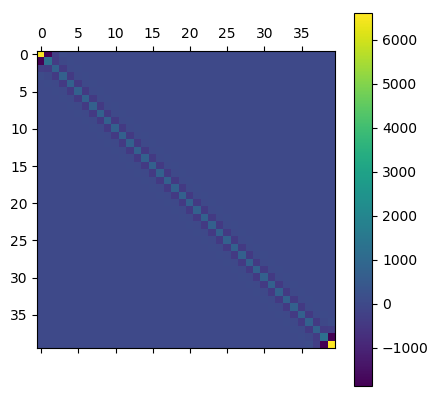

┌ Info: Omega caclulated successfully.
└ @ Main /Users/ta_nyan/Documents/diploma/StatReg.jl/src/basis.jl:242


PyObject <matplotlib.colorbar.Colorbar object at 0x1a3da5c50>

In [12]:
knots = collect(range(a, b, length=40))
basis = CubicSplineBasis(knots, ("dirichlet", "dirichlet"))
my_omega = omega(basis, 2)[1]
matshow(my_omega)
colorbar()

In [13]:
my_omega[3, 3]

732.3333334783302